In [1]:
import sys
import glob
import serial
import numpy as np


def get_serial_ports():
    """ Lists serial port names

        :raises EnvironmentError:
            On unsupported or unknown platforms
        :returns:
            A list of the serial ports available on the system
    """
    if sys.platform.startswith('win'):
        ports = ['COM%s' % (i + 1) for i in range(256)]
    elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
        # this excludes your current terminal "/dev/tty"
        ports = glob.glob('/dev/tty[A-Za-z]*')
    elif sys.platform.startswith('darwin'):
        ports = glob.glob('/dev/tty.*')
    else:
        raise EnvironmentError('Unsupported platform')

    result = []
    for port in ports:
        try:
            s = serial.Serial(port)
            s.close()
            result.append(port)
        except (OSError, serial.SerialException):
            pass
    return result

In [5]:
get_serial_ports()

['/dev/tty.Bluetooth-Incoming-Port', '/dev/tty.usbserial-AH01L3MB']

In [1]:
import serial
import numpy as np
import matplotlib.pyplot as plt

ser = serial.Serial('/dev/tty.usbserial-AH01L3MB', baudrate=115200)

ser.flushInput()

In [336]:
ser.write(b"E")
ser.readline()

b'Exposure time 21\r\n'

In [2]:
import pandas as pd

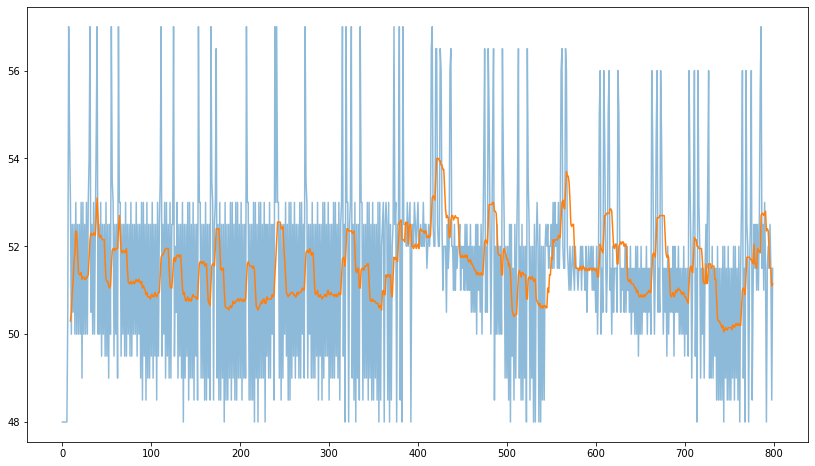

In [17]:
def get_sample():
    ser.write(b"r")
    ser_bytes = ser.readline()
    data = np.frombuffer(ser_bytes[:-2], np.byte)
    data = np.array(data)[:800]
    return data #- np.mean(data)

all_data = get_sample().reshape([1, -1])

for i in range(1):
    all_data = np.vstack([all_data, get_sample()])

data = all_data.mean(axis=0)
plt.figure(figsize=(14,8))
plt.plot(data, alpha=0.5)
plt.plot(pd.Series(data).rolling(10).mean())

# plt.ylim(0, 6)


In [41]:
import time

while True:
    try:
        ser.write(b"r")
        ser_bytes = ser.readline()
        decoded_data = np.frombuffer(ser_bytes[:-2], np.byte)
        time.sleep(2)
        print(decoded_data)
    except ValueError:
        print("Keyboard Interrupt")
        break

[48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48

[48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48 48

KeyboardInterrupt: 